In [1]:
# Try to get this to work as the DFFit example

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

import pydftools.dffit as df
from pydftools.selection import SelectionRdep, SelectionVeff
from pydftools.mockdata import mockdata
from pydftools.model import Schechter
from pydftools.plotting import dfplot, plot_dffit, mfplot, bin_data, plotcov, plot_veff
from scipy.interpolate import InterpolatedUnivariateSpline as spline

from copy import deepcopy
from pydftools.utils import centres_to_edges
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 110.0

In [9]:
p_true = (-2.0, 11.0, -1.3)
data, selection, model, other = mockdata(n=1000, p=p_true, sigma=0.5, seed=1234)

(-2.0, 11.0, -1.3)
0
2


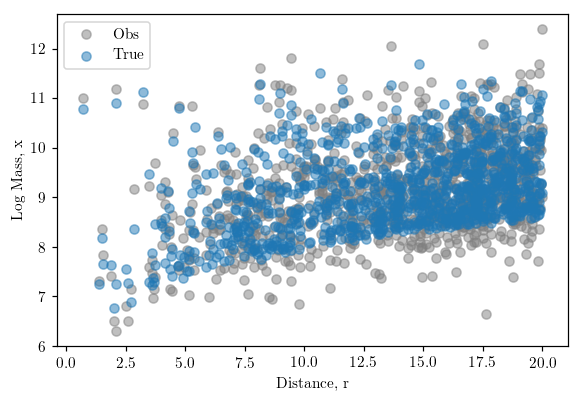

In [10]:
plt.scatter(data.r,data.x, color="gray", alpha=0.5, label="Obs")
plt.scatter(data.r, other['x_true'],alpha=0.5, label="True")
plt.xlabel("Distance, r")
plt.ylabel("Log Mass, x")
plt.legend()

In [11]:
# fit a Schechter function to the mock sample without accounting for errors. First create a fit object:
data_no_err = deepcopy(data)
data_no_err.x_err = None

dffit1 = df.DFFit(data = data_no_err, grid_dx = other['dx'], model = model, selection=selection)

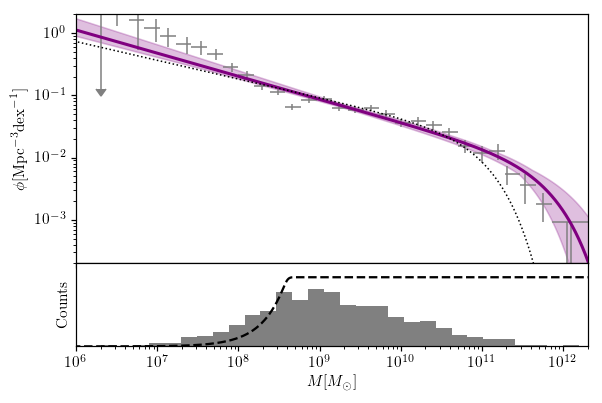

In [12]:
# Now plot the fit (the fit evaluates lazily)
mffig, mfax = mfplot(dffit1, p_true=p_true, show_bias_correction=False, xlim=(1e6,2e12), ylim=(2e-4, 2), col_fit='purple', col_data="grey")

In [13]:
# now, do the same again, while accountting for measurement errors in the fit
dffit2 = df.DFFit(data = data, grid_dx = other['dx'], model = model, selection=selection)

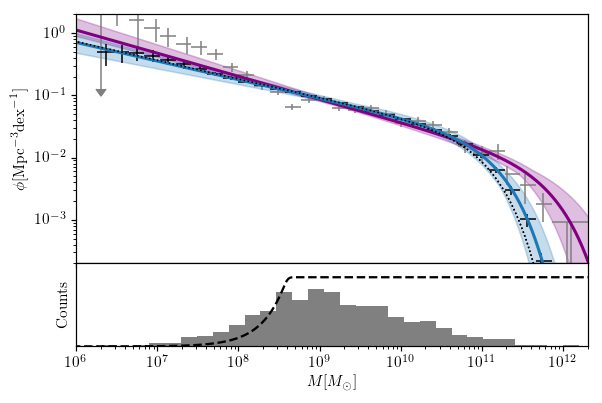

In [14]:
# In the notebook only, we need to make the plot again, because it gets closed at the end of a cell...
mffig, mfax = mfplot(dffit1, p_true=p_true, show_bias_correction=False, xlim=(1e6,2e12), ylim=(2e-4, 2), col_fit='purple', col_data="grey")

mf2fig, mf2ax = mfplot(dffit2, p_true=p_true, show_bias_correction=False, xlim=(1e6,2e12), ylim=(2e-4, 2), col_fit='C0', col_data="grey", fig = mffig, ax0 = mfax[0], ax1 = mfax[1], 
                       show_data_histogram=False,  # Don't want to re-plot the same histogram
                       show_input_data = False)

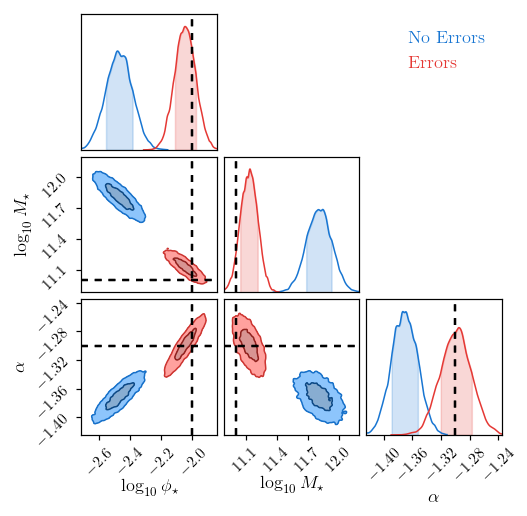

In [15]:
plotcov([dffit1, dffit2], ["No Errors", "Errors"], p_true=p_true);

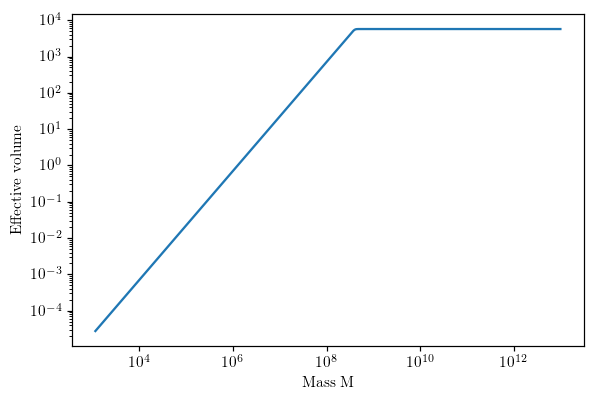

In [16]:
plot_veff(dffit2)

In [17]:
# now create a smaller survey of only 30 galaxies with 0.5dex mass errors
data30, selection, model, other30 = mockdata(n=30, p=p_true, sigma=0.5)

(-2.0, 11.0, -1.3)
0
2


In [18]:
# fit a Schechter function and determine uncertainties by resampling the data
dffit30 = df.DFFit(data = data30, grid_dx = other30['dx'], model = model, selection=selection)
dffit30.resample(n_bootstrap=30)

/home/steven/Documents/Projects/DFTOOLS/pydftools/pydftools/dffit.py:488: RuntimeWarning: divide by zero encountered in log
  lnl = np.sum(phi * self.grid.veff - np.log(phi) * rho_unbiased) * self.grid.dvolume
/home/steven/Documents/Projects/DFTOOLS/pydftools/pydftools/dffit.py:488: RuntimeWarning: invalid value encountered in multiply
  lnl = np.sum(phi * self.grid.veff - np.log(phi) * rho_unbiased) * self.grid.dvolume
/home/steven/anaconda2/envs/dftools/lib/python3.6/site-packages/numpy/linalg/linalg.py:1821: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


(<matplotlib.figure.Figure at 0x7fd54b29f908>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7fd3725bc438>])

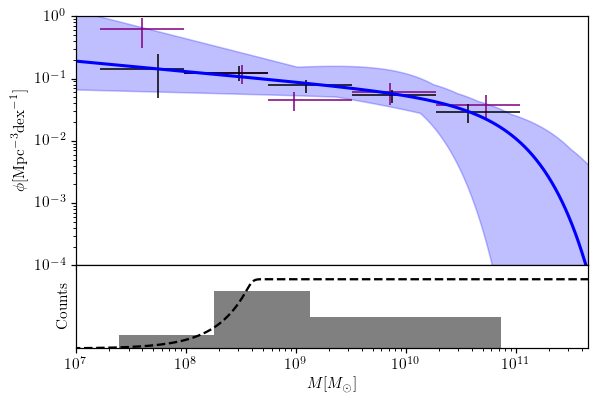

In [19]:
mfplot(dffit30, uncertainty_type = 1, show_bias_correction=False, xpower10=True, ylim=(1e-4,1e0), xlim=(1e7,4.5e11))

(<matplotlib.figure.Figure at 0x7fd371d214a8>,
  <matplotlib.axes._subplots.AxesSubplot at 0x7fd371bcb278>])

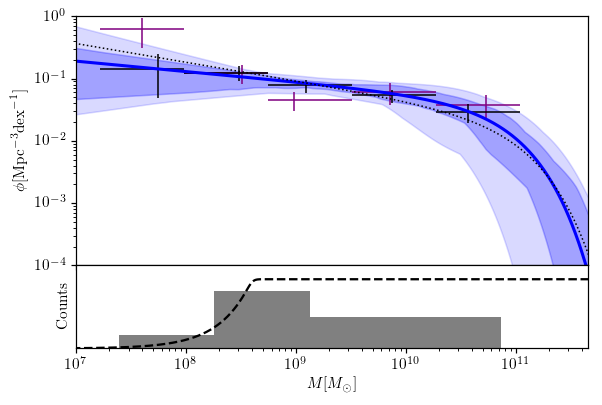

In [22]:
mfplot(dffit30, uncertainty_type = 3, show_bias_correction=False, xpower10=True, ylim=(1e-4,1e0), xlim=(1e7,4.5e11), p_true=p_true)